In [52]:
import os

os.environ["OMP_NUM_THREADS"] = "1"
os.nice(19)

19

In [53]:
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
from astropy import constants as c
%matplotlib inline

#styling
import seaborn as sns
sns.set_style(style='ticks', rc=None)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

matplotlib.rcParams.update({'font.size': 15})
pl.rcParams['ytick.labelsize'] = 'medium'
pl.rcParams['xtick.labelsize'] =  'medium'

In [61]:
df_all = pd.read_csv('data/PS_2025.01.07_21.46.16_all.csv', skiprows=295, delimiter=',',na_values=[''])
df_all

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,2023-09-19,2023-08,2023-09-19,2,1,2,0,0,0,0
1,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0,0
2,8,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,...,2023-09-19,2023-08,2023-09-19,0,1,1,0,0,0,0
3,15,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,...,2023-06-12,2022-09,2023-06-12,0,1,4,1,0,0,0
4,18,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,1,3,...,2018-09-04,2017-03,2018-09-06,5,1,4,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,38029,ups And b,ups And,b,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,1,2,...,2019-01-28,2011-01,2019-01-31,5,1,10,1,0,0,0
5807,38033,ups And c,ups And,c,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,1,2,...,2019-01-28,2011-01,2019-01-31,5,1,10,1,0,0,0
5808,38043,ups And d,ups And,d,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,1,2,...,2019-01-28,2011-01,2019-01-31,5,1,10,1,0,0,0
5809,38044,ups Leo b,ups Leo,b,NaN,NaN,TIC 49430557,Gaia DR2 3794167001116433152,1,1,...,2022-01-10,2021-12,2022-01-10,0,0,0,0,0,0,0


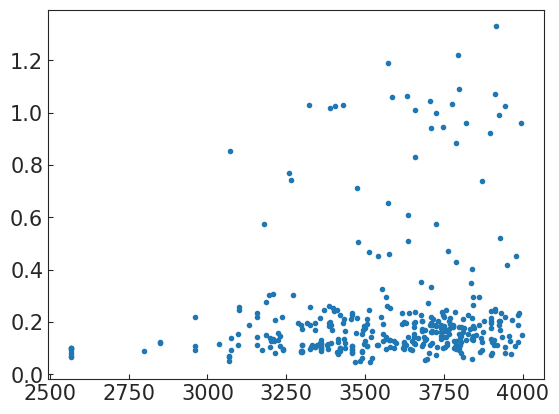

In [65]:
df = df_all[df_all['discoverymethod']=='Transit']
df = df[df['st_teff']<4000]
pl.plot(df['st_teff'],df['pl_radj'], '.')

In [47]:
df_young = pd.read_csv('data/PS_2025.01.04_Youngs.csv', skiprows=299, delimiter=',',na_values=[''])
df_young

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,IRAS 04125+2902 b,IRAS 04125+2902,b,NaN,NaN,TIC 56658270,Gaia DR2 164800235906366976,1,2,1,...,2024-12-10,2024-11,2024-12-10,0,0,0,0,0,0,0
1,K2-33 b,K2-33,b,NaN,NaN,TIC 49040478,Gaia DR2 6245758900889486720,1,1,1,...,2016-07-06,2016-09,2016-06-23,0,0,0,0,0,0,0
2,TOI-1227 b,TOI-1227,b,NaN,NaN,TIC 360156606,Gaia DR2 5842480953772012928,1,1,1,...,2022-03-28,2022-04,2022-03-28,0,0,0,0,0,0,0
3,K2-225 b,K2-225,b,NaN,NaN,TIC 98677125,Gaia DR2 3579573358218514944,1,1,1,...,2024-11-20,2023-04,2024-11-20,0,0,0,0,0,0,0
4,V1298 Tau e,V1298 Tau,e,NaN,NaN,TIC 15756231,Gaia DR2 51886335968692480,1,3,4,...,2024-03-25,2023-12,2024-03-25,3,0,0,0,0,0,0
5,HD 114082 b,HD 114082,b,HD 114082,HIP 64184,TIC 441546821,Gaia DR2 6055854551117476480,1,1,1,...,2022-11-29,2022-11,2022-11-29,0,0,0,0,0,0,0
6,HIP 67522 b,HIP 67522,b,HD 120411,HIP 67522,TIC 166527623,Gaia DR2 6113920619134019456,1,1,2,...,2024-09-28,2024-09,2024-09-28,0,1,0,0,0,3,0
7,HIP 67522 c,HIP 67522,c,HD 120411,HIP 67522,TIC 166527623,Gaia DR2 6113920619134019456,1,1,2,...,2024-09-28,2024-09,2024-09-28,0,1,0,0,0,0,0
8,AU Mic b,AU Mic,b,HD 197481,HIP 102409,TIC 441420236,Gaia DR2 6794047652729201024,1,1,3,...,2024-09-28,2023-12,2024-09-28,1,1,0,1,0,0,0
9,AU Mic c,AU Mic,c,HD 197481,HIP 102409,TIC 441420236,Gaia DR2 6794047652729201024,1,1,3,...,2024-09-28,2023-12,2024-09-28,2,1,0,1,0,0,0


In [51]:
#df_all = pd.read_csv('PS_2022.10.27_23.24.19.csv', skiprows=96, delimiter=',',na_values=[''])
df_all = pd.read_csv('data/PS_2025.01.04_Mdwarfs.csv', skiprows=297, delimiter=',',na_values=[''])
df_cool = df_all[df_all['st_teff']<3000]
df_cool[['hostname', 'pl_letter', 'st_teff']]

,hostname,pl_letter,st_teff
0,TRAPPIST-1,b,2566.0
1,TRAPPIST-1,c,2566.0
2,TRAPPIST-1,d,2566.0
3,TRAPPIST-1,e,2566.0
4,TRAPPIST-1,f,2566.0
5,TRAPPIST-1,g,2566.0
6,TRAPPIST-1,h,2566.0
7,SPECULOOS-3,b,2800.0
8,LP 890-9,b,2850.0
9,LP 890-9,c,2850.0


In [41]:
df_cool['pl_rade']

0     1.116
1     1.097
2     0.788
3     0.920
4     1.045
5     1.129
6     0.755
7     0.977
8     1.320
9     1.367
10    1.212
11    2.438
12    1.032
Name: pl_rade, dtype: float64

In [39]:
df_all[df_all['st_teff']<3000]

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,TRAPPIST-1 b,TRAPPIST-1,b,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,1,1,7,...,2022-11-14,2021-02,2022-11-14,1,0,0,0,1,0,0
1,TRAPPIST-1 c,TRAPPIST-1,c,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,1,1,7,...,2022-11-14,2021-02,2022-11-14,1,0,0,0,1,0,0
2,TRAPPIST-1 d,TRAPPIST-1,d,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,1,1,7,...,2022-11-14,2021-02,2022-11-14,3,0,0,0,0,0,0
3,TRAPPIST-1 e,TRAPPIST-1,e,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,1,1,7,...,2022-11-14,2021-02,2022-11-14,1,0,0,0,0,0,0
4,TRAPPIST-1 f,TRAPPIST-1,f,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,1,1,7,...,2022-11-14,2021-02,2022-11-14,1,0,0,0,0,0,0
5,TRAPPIST-1 g,TRAPPIST-1,g,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,1,1,7,...,2022-11-14,2021-02,2022-11-14,1,0,0,0,0,1,0
6,TRAPPIST-1 h,TRAPPIST-1,h,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,1,1,7,...,2022-11-14,2021-02,2022-11-14,1,0,0,0,0,1,0
7,SPECULOOS-3 b,SPECULOOS-3,b,NaN,NaN,TIC 230741378,Gaia DR2 1869054868256849920,1,1,1,...,2024-05-21,2024-05,2024-05-21,0,0,0,0,0,0,0
8,LP 890-9 b,LP 890-9,b,NaN,NaN,TIC 44898913,Gaia DR2 4886243456388510720,1,1,2,...,2022-09-14,2022-09,2022-09-14,0,0,0,0,0,0,0
9,LP 890-9 c,LP 890-9,c,NaN,NaN,TIC 44898913,Gaia DR2 4886243456388510720,1,1,2,...,2022-09-14,2022-09,2022-09-14,0,0,0,0,0,0,0


In [16]:
set(df_all['hostname'])

{'GJ 1214',
 'K2-320',
 'K2-415',
 'Kepler-42',
 'Kepler-445',
 'LHS 1140',
 'LHS 3844',
 'LP 791-18',
 'LP 890-9',
 'SPECULOOS-3',
 'TOI-1227',
 'TOI-1452',
 'TOI-1696',
 'TOI-2015',
 'TOI-2120',
 'TOI-2406',
 'TOI-3884',
 'TOI-6008',
 'TOI-715',
 'TRAPPIST-1'}

In [17]:
len(set(df_all['hostname']))

20

In [22]:
idx_b = df_all[df_all['pl_name'].str.endswith(' b')].index #すご！
print(idx_b)

Int64Index([0, 7, 8, 10, 13, 14, 17, 18, 19, 20, 22, 23, 24, 25, 26, 29, 30,
            31, 32, 33],
           dtype='int64')


In [35]:
df_all['pl_radj']

0     0.100
1     0.098
2     0.070
3     0.082
4     0.093
5     0.101
6     0.067
7     0.087
8     0.118
9     0.122
10    0.108
11    0.218
12    0.092
13    0.116
14    0.070
15    0.065
16    0.051
17    0.854
18    0.092
19    0.138
20    0.154
21    0.113
22    0.255
23    0.244
24    0.189
25    0.234
26    0.140
27    0.220
28    0.110
29    0.091
30    0.574
31    0.149
32    0.276
33    0.302
Name: pl_radj, dtype: float64

In [34]:
df_b = df_all.loc[idx_b].copy()
df_b[['hostname', 'sy_pnum','st_teff','']]

,hostname,sy_pnum,st_teff
0,TRAPPIST-1,7,2566.0
7,SPECULOOS-3,1,2800.0
8,LP 890-9,2,2850.0
10,LP 791-18,3,2960.0
13,LHS 3844,1,3036.0
14,Kepler-42,3,3068.0
17,TOI-1227,1,3072.0
18,TOI-6008,1,3075.0
19,TOI-715,1,3075.0
20,LHS 1140,2,3096.0


In [104]:
len(df_all)

5747

In [105]:
df_young = df_all[df_all['st_age']<=1]

abs_err1 = np.abs(df_young['st_ageerr1'])
abs_err2 = np.abs(df_young['st_ageerr2'])

st_ageerr = np.maximum(abs_err1, abs_err2)

df_young = df_young[st_ageerr< df_young['st_age']*3 ]
df_young

,loc_rowid,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
11,36,2M0437 b,2MASS J04372171+2651014,1,1,1,Imaging,2021,Subaru Telescope,Published Confirmed,...,-1.133,10.386,0.018,-0.018,14.33740,0.000772,-0.000772,2021-12-13,2021-10,2021-12-13
13,39,2MASS J01225093-2439505 b,2MASS J01225093-2439505,1,1,1,Imaging,2013,W. M. Keck Observatory,Published Confirmed,...,-0.074,9.198,0.026,-0.026,12.90250,0.001151,-0.001151,2014-05-14,2013-09,2014-05-14
14,40,2MASS J02192210-3925225 b,2MASS J02192210-3925225,1,1,1,Imaging,2015,Cerro Tololo Inter-American Observatory,Published Confirmed,...,NaN,10.404,0.025,-0.025,15.01230,0.000624,-0.000624,2015-05-14,2015-06,2015-05-14
15,41,2MASS J0249-0557 c,2MASS J0249-0557 A,1,2,1,Imaging,2018,Mauna Kea Observatory,Published Confirmed,...,-0.200,11.055,0.021,-0.021,15.68940,0.001224,-0.001224,2024-05-13,2018-08,2024-05-13
20,46,2MASS J12073346-3932539 b,2MASS J12073346-3932539,1,1,1,Imaging,2004,Paranal Observatory,Published Confirmed,...,NaN,11.945,0.026,-0.026,17.40760,0.002154,-0.002154,2016-02-24,2004-10,2016-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5666,36041,WASP-93 b,WASP-93,1,1,1,Transit,2016,SuperWASP,Published Confirmed,...,-0.007,9.942,0.016,-0.016,10.97800,0.000447,-0.000447,2016-09-06,2016-12,2016-09-08
5697,36199,YSES 2 b,YSES 2,1,1,1,Imaging,2021,Paranal Observatory,Published Confirmed,...,-0.011,8.358,0.029,-0.029,10.53520,0.002319,-0.002319,2021-05-28,2021-04,2021-05-28
5703,36212,b Cen AB b,b Cen A,1,2,1,Imaging,2021,Paranal Observatory,Published Confirmed,...,-0.030,4.487,0.026,-0.026,4.01093,0.008918,-0.008918,2022-01-24,2021-12,2022-01-24
5709,36229,eps Eri b,eps Eri,1,1,1,Radial Velocity,2000,Multiple Observatories,Published Confirmed,...,-0.023,1.776,0.286,-0.286,3.47719,0.005545,-0.005545,2022-07-18,2021-11,2022-07-18


In [137]:
P = np.linspace(1.0e-1, 10**(1.15), 100)
a1 =  10 ** (-0.33 * np.log10(P) + 1.17)
a2 =  10 ** (0.68 * np.log10(P))

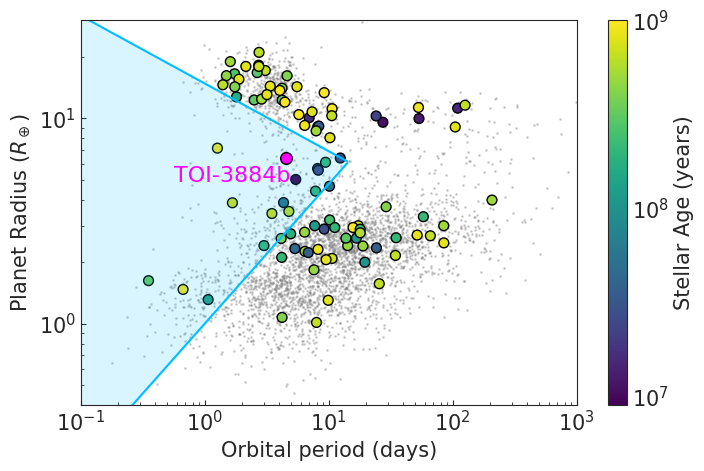

In [145]:
f, ax = pl.subplots(1, 1, figsize=(8, 5))
ax.loglog()

pl.plot(df_all['pl_orbper'], df_all['pl_rade'], '.', ms=2, alpha=0.3, color='gray', zorder=0)

sc = ax.scatter(df_young['pl_orbper'], df_young['pl_rade'], c=np.log10(df_young['st_age']*1e9), 
                cmap='viridis', s=50, alpha=1, edgecolor='k', zorder=1)

cbar = pl.colorbar(sc)
cbar.set_label(r'Stellar Age (years)')

# カラーバーの目盛りを設定（10^5, 10^6, 10^7, 10^8, 10^9）
cbar.set_ticks([7,8,9])
cbar.set_ticklabels([r'$10^7$', r'$10^8$', r'$10^9$'])

ax.set_xlim(1.0e-1, 1.0e3)
ax.set_ylim(4.0e-1, 3.0e1)

pl.plot(P, a1, '-', color='deepskyblue')
pl.plot(P, a2, '-', color='deepskyblue')
pl.fill_between(P, a1, a2, alpha=0.15,color='deepskyblue' )

#TOI-3884
ax.scatter(4.5445828, 6.43, s=70, alpha=1, edgecolor='k', color='magenta')
ax.text(4.9, 4.9, 'TOI-3884b', color='magenta', fontsize=16, ha='right')

ax.set_xlabel(r'Orbital period (days)')
ax.set_ylabel(r'Planet Radius ($R_\oplus$)')

f.savefig('per-rad-plot.png')

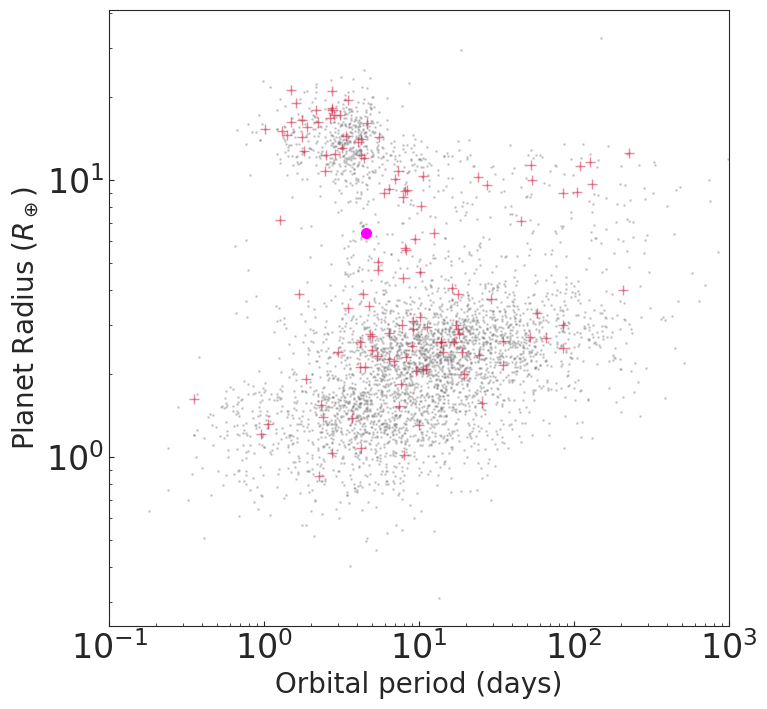

In [31]:
f,ax = pl.subplots(1,1,figsize=(8,8))
ax.loglog()

pl.plot(df_all['pl_orbper'], df_all['pl_rade'],'.', ms=2,alpha=0.3, color='gray')
pl.plot(df_young['pl_orbper'], df_young['pl_rade'],'o', ms=7, alpha=0.5, color='crimson')

pl.xlim(1.0e-1, 1.0e3)
#pl.ylim(0.4, 50)

pl.xlabel(r'Orbital period (days)')
pl.ylabel(r'Planet Radius ($R_\oplus$)')

#TOI-3884
pl.plot(4.5445828, 6.43, 'o', color='magenta', ms =7)

#f.savefig('../TLSE/K2-25/output/scatter_plot.pdf', bbox_inches='tight')

In [6]:
df_M=df_all[df_all['st_teff']<4000]
len(df_M)

393

In [7]:
df_targets = []
name_targets = []

df_tmp = df_all[df_all['hostname']=='TOI-1696']
df_targets.append(df_tmp)
name_targets.append(list(df_tmp['pl_name'])[0])

In [8]:
df_tmp = df_all[df_all['hostname']=='K2-25']
df_targets.append(df_tmp)
name_targets.append(list(df_tmp['pl_name'])[0])

df_tmp = df_all[df_all['pl_name']=='LHS 1140 b']
df_targets.append(df_tmp)
name_targets.append(list(df_tmp['pl_name'])[0])

df_tmp = df_all[df_all['pl_name']=='TRAPPIST-1 h']
df_targets.append(df_tmp)
name_targets.append(list(df_tmp['pl_name'])[0])

In [9]:
name_targets

['TOI-1696 b', 'K2-25 b', 'LHS 1140 b', 'TRAPPIST-1 h']

Text(0, 0.5, 'Planetary Radius ($R_\\oplus$)')

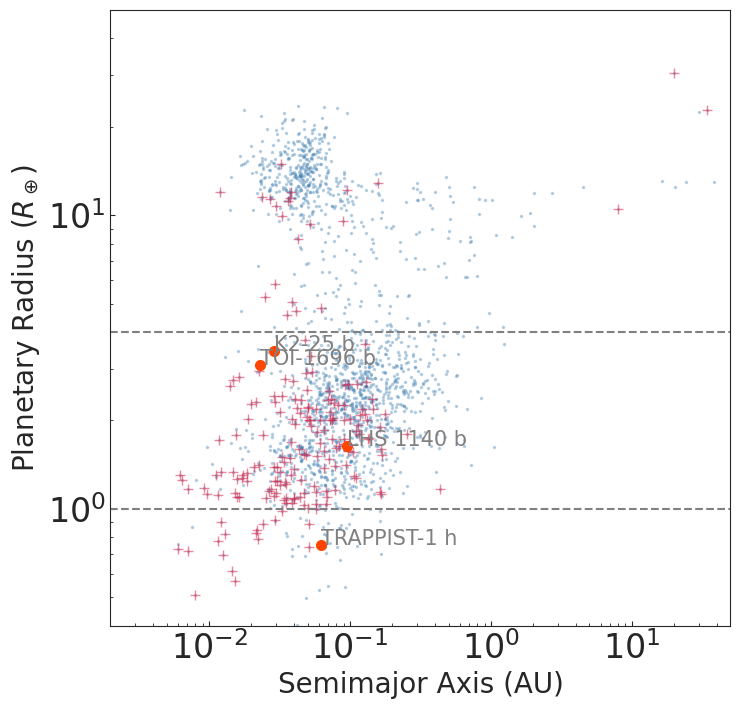

In [10]:
f,ax = pl.subplots(1,1,figsize=(8,8))
ax.loglog()

pl.plot(df_all['pl_orbsmax'], df_all['pl_rade'],'.', ms=3,alpha=0.3, color='steelblue')
pl.plot(df_M['pl_orbsmax'], df_M['pl_rade'],'+', ms=7, alpha=0.5, color='crimson')

for n in range(len(name_targets)):
    df = df_targets[n]
    #c = matplotlib.patches.Circle((df['pl_orbsmax'],df['pl_rade']), radius=0.2)
    #ax.add_patch(c)
    
    pl.plot(df['pl_orbsmax'], df['pl_rade'],'o', ms=7, alpha=1, color='orangered')
    ax.text(df['pl_orbsmax'], df['pl_rade'],name_targets[n], color='gray', fontsize=15)
    
ax.hlines(4.0, 2.0e-3, 50, linestyles='dashed', color='gray')
ax.hlines(1.0, 2.0e-3, 50, linestyles='dashed', color='gray')


pl.xlim(2.0e-3, 50)
pl.ylim(0.4, 50)

pl.xlabel(r'Semimajor Axis (AU)')
pl.ylabel(r'Planetary Radius ($R_\oplus$)')

#f.savefig('../TLSE/K2-25/output/scatter_plot.pdf', bbox_inches='tight')

In [11]:
10**1.224

16.749428760264372

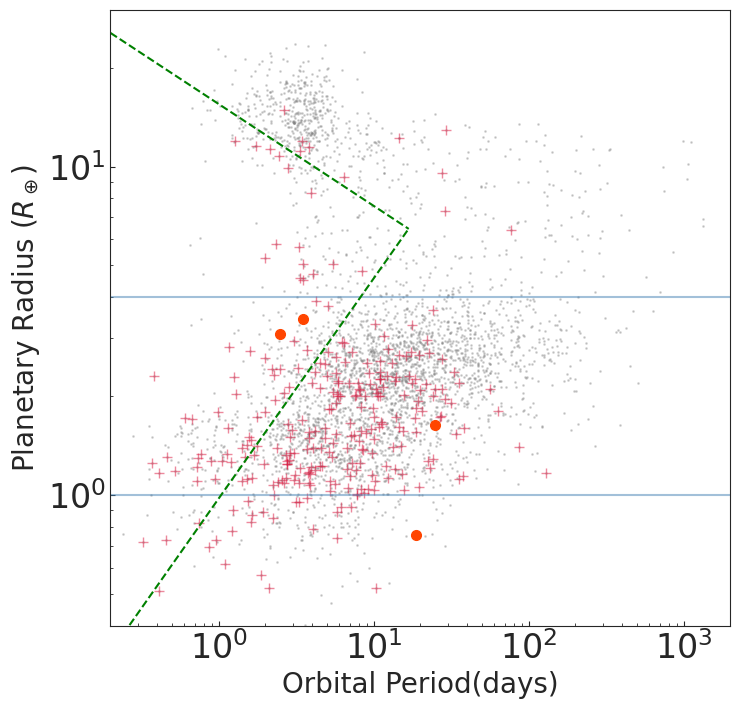

In [12]:
f,ax = pl.subplots(1,1,figsize=(8,8))
ax.loglog()

pl.plot(df_all['pl_orbper'], df_all['pl_rade'],'.', ms=2,alpha=0.3, color='gray', zorder=0)
pl.plot(df_M['pl_orbper'], df_M['pl_rade'],'+', ms=7, alpha=0.5, color='crimson')

for n in range(len(name_targets)):
    df = df_targets[n]
    #c = matplotlib.patches.Circle((df['pl_orbsmax'],df['pl_rade']), radius=0.2)
    #ax.add_patch(c)
    
    pl.plot(df['pl_orbper'], df['pl_rade'],'o', ms=7, alpha=1, color='orangered')
    #ax.text(df['pl_orbper'], df['pl_rade'],name_targets[n], color='gray', fontsize=15)
    
ax.hlines(1, 0.2, 2000, color='steelblue', alpha=0.5)
ax.hlines(4, 0.2, 2000, color='steelblue', alpha=0.5)

P = np.linspace(0.2, 16.8, 1000)
R1 = 10**(-0.31*np.log10(P) +1.19)
R2 = 10**(0.67*np.log10(P)-0.01)

pl.plot(P, R1, '--', color='green')
pl.plot(P, R2, '--', color='green')

#R=(0.254)P−(0.003±0.025),

pl.xlim(0.2, 2000)
pl.ylim(0.4, 30)

pl.xlabel(r'Orbital Period(days)')
pl.ylabel(r'Planetary Radius ($R_\oplus$)')

f.savefig('../TLSE/K2-25/output/scatter_plot.pdf', bbox_inches='tight')

In [13]:
df_all.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

In [14]:
df_all_s = df_all[df_all['pl_bmasseerr1'].notna()]
df_all_s = df_all_s[df_all_s['pl_bmasseerr2'].notna()]
df_all_s = df_all_s[df_all_s['pl_bmasseerr1'] < 0.25 * df_all_s['pl_bmasse']]
df_all_s = df_all_s[np.abs(df_all_s['pl_bmasseerr2']) < 0.25 * df_all_s['pl_bmasse']]


df_all_s = df_all_s[df_all_s['pl_radeerr1'].notna()]
df_all_s = df_all_s[df_all_s['pl_radeerr2'].notna()]
df_all_s = df_all_s[df_all_s['pl_radeerr1'] < 0.08 * df_all_s['pl_rade']]
df_all_s = df_all_s[np.abs(df_all_s['pl_radeerr2']) < 0.08 * df_all_s['pl_rade']]

df_all_s.reset_index(drop=True)

len(df_all_s)

560

In [15]:
df_M_s=df_all_s[df_all_s['st_teff']<4000]
len(df_M_s)

57

In [16]:
df_targets_s = []
name_targets_s = []

#df_tmp = df_all[df_all['hostname']=='TOI-1696']
#df_targets.append(df_tmp)
#name_targets.append(list(df_tmp['pl_name'])[0])

In [17]:
df_tmp = df_all_s[df_all_s['hostname']=='K2-25']
df_targets_s.append(df_tmp)
name_targets_s.append(list(df_tmp['pl_name'])[0])

df_tmp = df_all_s[df_all_s['pl_name']=='LHS 1140 b']
df_targets_s.append(df_tmp)
name_targets_s.append(list(df_tmp['pl_name'])[0])

df_tmp = df_all_s[df_all_s['pl_name']=='TRAPPIST-1 h']
df_targets_s.append(df_tmp)
name_targets_s.append(list(df_tmp['pl_name'])[0])

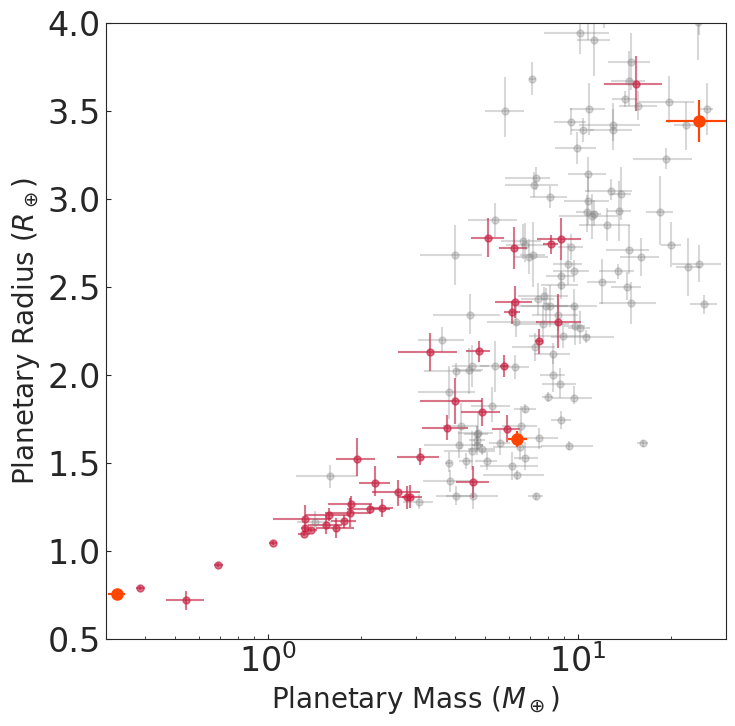

In [18]:
f,ax = pl.subplots(1,1,figsize=(8,8))
pl.xlim(0.3, 30)


pl.errorbar(df_all_s['pl_bmasse'], df_all_s['pl_rade'],xerr=[np.abs(df_all_s['pl_bmasseerr2']),df_all_s['pl_bmasseerr1']],\
            yerr=[np.abs(df_all_s['pl_radeerr2']),df_all_s['pl_radeerr1']], fmt='o', ms=5,alpha=0.3, color='gray')
pl.errorbar(df_M_s['pl_bmasse'], df_M_s['pl_rade'],xerr=[np.abs(df_M_s['pl_bmasseerr2']),df_M_s['pl_bmasseerr1']],\
            yerr=[np.abs(df_M_s['pl_radeerr2']),df_M_s['pl_radeerr1']], fmt='o', ms=5,alpha=0.5, color='crimson')
#pl.plot(df_M['pl_bmasse'], df_M['pl_rade'],'+', ms=7, alpha=0.5, color='crimson')

for n in range(len(name_targets_s)):
    df = df_targets_s[n]

    pl.errorbar(df['pl_bmasse'], df['pl_rade'],xerr=[np.abs(df['pl_bmasseerr2']),df['pl_bmasseerr1']],\
                yerr=[np.abs(df['pl_radeerr2']),df['pl_radeerr1']],fmt='o', ms=8, alpha=1, color='orangered')
    #pl.plot(df['pl_bmasse'], df['pl_rade'],'o', ms=7, alpha=1, color='orangered')
    #ax.text(df['pl_bmasse'], df['pl_rade'],name_targets[n], color='gray', fontsize=15)

pl.ylim(0.5, 4)

pl.xlabel(r'Planetary Mass ($M_\oplus$)')
pl.ylabel(r'Planetary Radius ($R_\oplus$)')
pl.xscale('log')

理論モデル
https://lweb.cfa.harvard.edu/~lzeng/planetmodels.html#mrtables　　

元論文
https://www.pnas.org/doi/10.1073/pnas.1812905116#supplementary-materials

In [19]:
files=['data/Earthlike01h500K1mbar.txt',
 'data/Earthlike03h500K1mbar.txt',
          'data/Earthlike1h500K1mbar.txt',
 'data/Earthlike2h500K1mbar.txt']
 #'data/Earthlike5h500K1mbar.txt']

df_h2 = []
for file in files:
    df_h2.append(pd.read_csv(file, sep='\t', header=None))
labels_h2=[0.1, 0.3, 1, 2]
lss = ['solid', 'dashdot', 'dashed', 'dotted']

In [20]:
glob('data/massradius*.txt')

['data/massradiusEarthlikeRocky.txt',
 'data/massradiusFe.txt',
 'data/massradius_100percentH2O_500K_1mbar.txt',
 'data/massradius_50percentH2O_500K_1mbar.txt']

In [21]:
files =['data/massradius_100percentH2O_500K_1mbar.txt',\
       'data/massradiusEarthlikeRocky.txt',\
       'data/massradiusFe.txt']

df_th = []
for file in files:
    df_th.append(pd.read_csv(file, sep='\t', header=None))
labels_th=['100% H2O', 'Earth-like (32.5% Fe+67.5% MgSiO3)', '100% Fe']

col_ths = ['steelblue', 'darkorange', 'sienna']

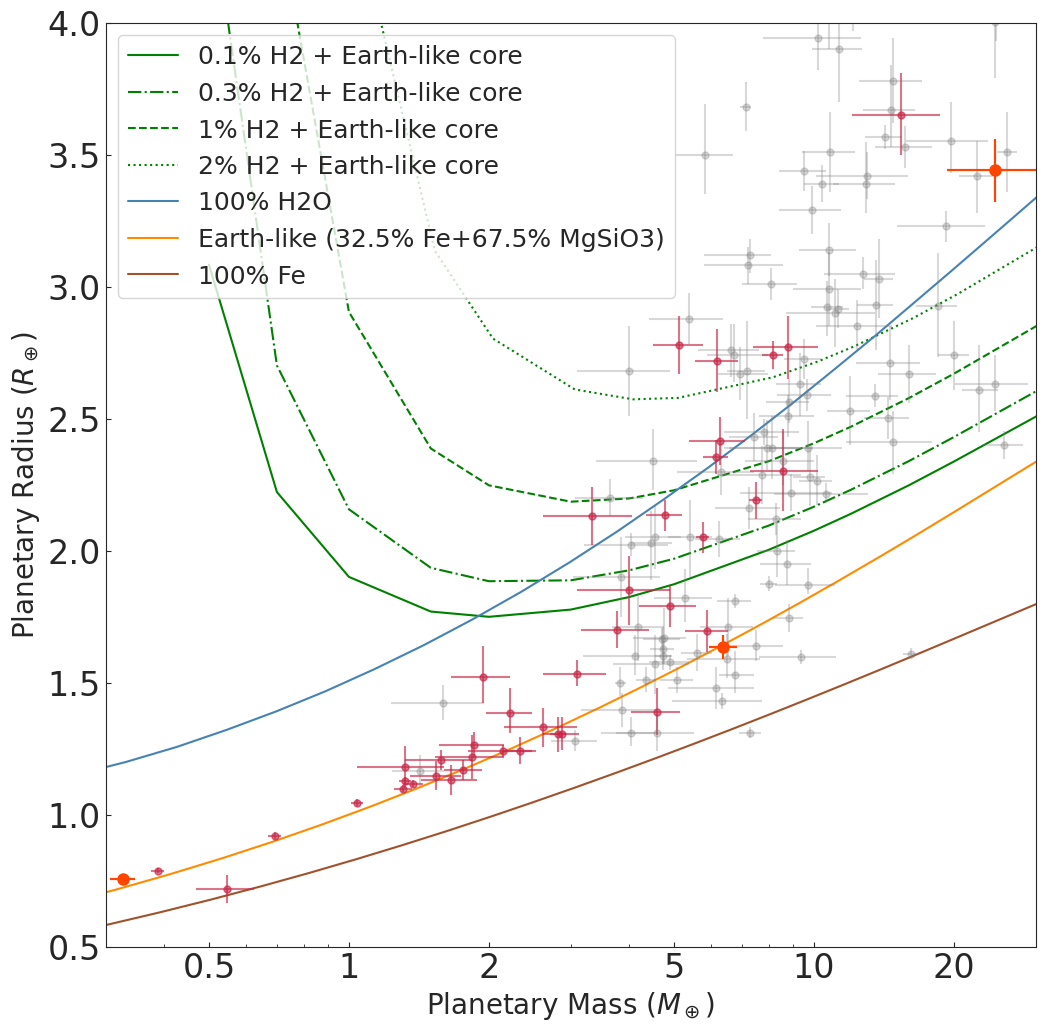

In [22]:
f,ax = pl.subplots(1,1,figsize=(12,12))
pl.xlim(0.3, 30)

for ls, lb, df in zip(lss, labels_h2, df_h2):
    pl.plot(df[0],df[1], label=r'{}% H2 + Earth-like core'.format(lb), color='green', ls=ls)
    
for col, lb, df in zip(col_ths, labels_th, df_th):
    pl.plot(df[0],df[1], label=r'{}'.format(lb), color=col, ls='solid')
    
pl.legend(fontsize=18)


pl.errorbar(df_all_s['pl_bmasse'], df_all_s['pl_rade'],xerr=[np.abs(df_all_s['pl_bmasseerr2']),df_all_s['pl_bmasseerr1']],\
            yerr=[np.abs(df_all_s['pl_radeerr2']),df_all_s['pl_radeerr1']], fmt='o', ms=5,alpha=0.3, color='gray')
pl.errorbar(df_M_s['pl_bmasse'], df_M_s['pl_rade'],xerr=[np.abs(df_M_s['pl_bmasseerr2']),df_M_s['pl_bmasseerr1']],\
            yerr=[np.abs(df_M_s['pl_radeerr2']),df_M_s['pl_radeerr1']], fmt='o', ms=5,alpha=0.5, color='crimson')
#pl.plot(df_M['pl_bmasse'], df_M['pl_rade'],'+', ms=7, alpha=0.5, color='crimson')

for n in range(len(name_targets_s)):
    df = df_targets_s[n]

    pl.errorbar(df['pl_bmasse'], df['pl_rade'],xerr=[np.abs(df['pl_bmasseerr2']),df['pl_bmasseerr1']],\
                yerr=[np.abs(df['pl_radeerr2']),df['pl_radeerr1']],fmt='o', ms=8, alpha=1, color='orangered')
    #pl.plot(df['pl_bmasse'], df['pl_rade'],'o', ms=7, alpha=1, color='orangered')
    #ax.text(df['pl_bmasse'], df['pl_rade'],name_targets[n], color='gray', fontsize=15)

pl.ylim(0.5, 4)

pl.xlabel(r'Planetary Mass ($M_\oplus$)')
pl.ylabel(r'Planetary Radius ($R_\oplus$)')
pl.xscale('log')
pl.xticks([0.5, 1, 2, 5,10, 20], ["0.5","1", "2", "5", "10", "20"])

f.savefig('mass-radius.pdf', bbox_inches='tight')

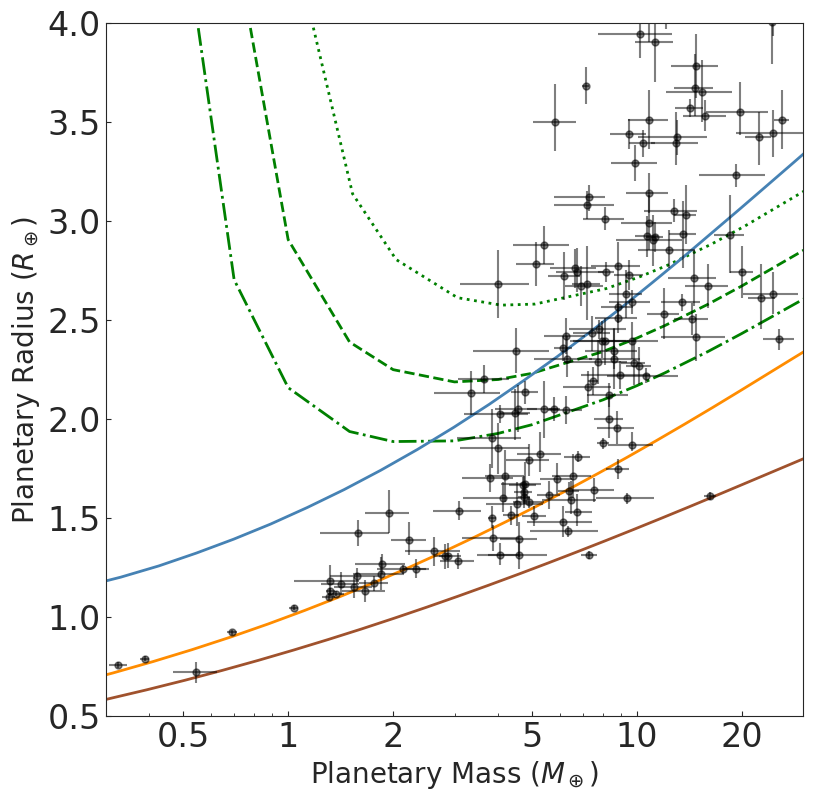

In [36]:
f,ax = pl.subplots(1,1,figsize=(9,9))
pl.xlim(0.3, 30)

for ls, lb, df in zip(lss[1:], labels_h2[1:], df_h2[1:]):
    pl.plot(df[0],df[1], label=r'{}% H2 + Earth-like core'.format(lb), color='green', ls=ls, lw=2)
    
for col, lb, df in zip(col_ths, labels_th, df_th):
    pl.plot(df[0],df[1], label=r'{}'.format(lb), color=col, ls='solid', lw=2)
    
#pl.legend(fontsize=18)


pl.errorbar(df_all_s['pl_bmasse'], df_all_s['pl_rade'],xerr=[np.abs(df_all_s['pl_bmasseerr2']),df_all_s['pl_bmasseerr1']],\
            yerr=[np.abs(df_all_s['pl_radeerr2']),df_all_s['pl_radeerr1']], fmt='o', ms=5,alpha=0.5, color='k')
#pl.errorbar(df_M_s['pl_bmasse'], df_M_s['pl_rade'],xerr=[np.abs(df_M_s['pl_bmasseerr2']),df_M_s['pl_bmasseerr1']],\
 #           yerr=[np.abs(df_M_s['pl_radeerr2']),df_M_s['pl_radeerr1']], fmt='o', ms=5,alpha=0.3, color='k')
#pl.plot(df_M['pl_bmasse'], df_M['pl_rade'],'+', ms=7, alpha=0.5, color='crimson')


pl.ylim(0.5, 4)

pl.xlabel(r'Planetary Mass ($M_\oplus$)')
pl.ylabel(r'Planetary Radius ($R_\oplus$)')
pl.xscale('log')
pl.xticks([0.5, 1, 2, 5,10, 20], ["0.5","1", "2", "5", "10", "20"])

f.savefig('mass-radius_simple.pdf', bbox_inches='tight')